# Lec 01

Goals
- Basic understanding of machine learning algorithms
  - Linear regression, Logistic regression(classification)
  - Neural networks, CNN, RNN

Schedule
- Machine learning basic concepts
- Linear regression
- Logistic regression(classification)
- Multivariate (Vector) linear/logistic regression
- Neural networks
- Deep learning
  - CNN/RNN/Bidirectional Neural networks

 Basic concepts
 - What is ML?
 - What is learning? (supervised vs unsupervised)
 - What is regression?
 - What is classification?

Machine Learning
- Limitations of explicit programming  
  ex) Spam filter, Automatic driving
- Machine learning: "Field of study that gives computers the abilitiy to learn without being explicitly programmed"
- supervised vs unsupervised by learning method
  - supervised learning: learning with labeled examples(training set)
  - unsupervised learning: un-labeled data
  
- Supervised Learning: most common problem type in ML
  - Image labeling: learning from tagged images\
  - Email spam filter
  - Prediction exam score
  
- Training data set
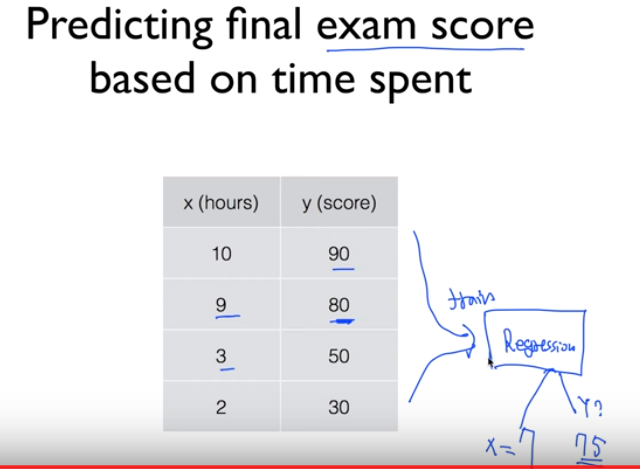

- Types of supervised learning
  - Predicting final exam score based on time spent: regression
  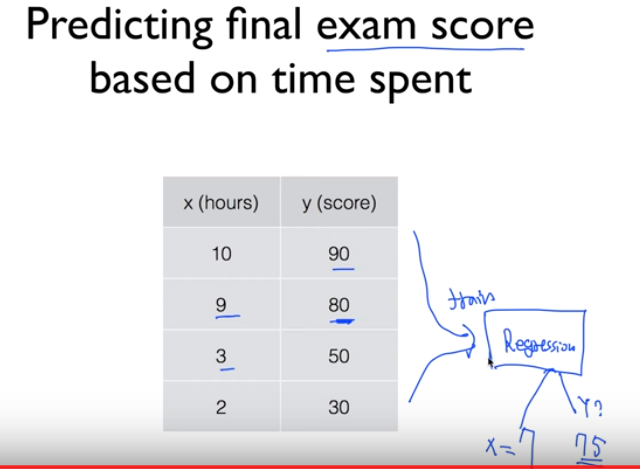
  - Pass/non-pass based on time spent : binary classification
  - Letter grade(A, B, C, E and F) based on time spent:multi-label classfication

## Lab01

TensorFlos is an open source software library for numerical computation using *data flow graph*

Nodes = the gragh represent mathematical operations
Edges = the multidimensional data arrays (tensors) communicated between them
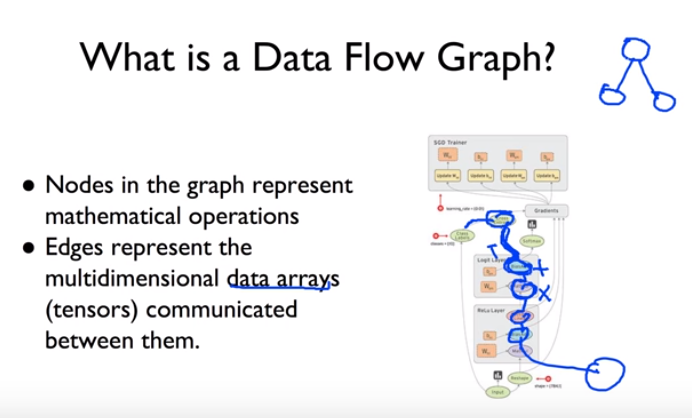

In [1]:
import tensorflow as tf

In [3]:
tf.__version__

'1.10.0'

https://github.com/hunkim/DeepLearningZeroToAll

### Hello TensorFlow!

In [5]:
#create a constant op
#This op is added as a node to the default gratph

hello = tf.constant("Hello, TensorFlow!")

#seart a TF session
sess = tf.Session()

#run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


b'String '**b**' indicattes *Bytes* literals.

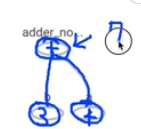

In [6]:
node1 = tf.constant(3.0) #tf.float32 is implicit
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3:", node3)

node1: Tensor("Const_2:0", shape=(), dtype=float32) node2: Tensor("Const_3:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [7]:
sess = tf.Session()

In [8]:
print("sess.run(node1, node2):", sess.run([node1, node2]))
print("sess.run(node3):", sess.run(node3))

sess.run(node1, node2): [3.0, 4.0]
sess.run(node3): 7.0


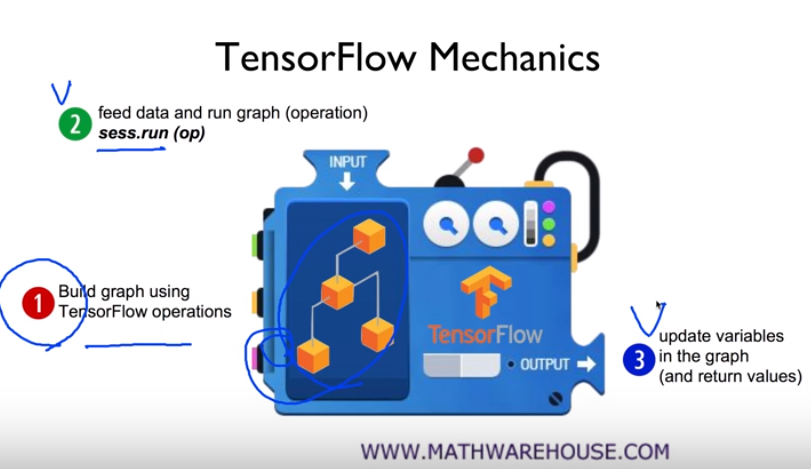

### Placeholder
**그래프를 미리 만들어 놓고 실행시키는 단계에서 값을 넣어서 계산하고 싶다**
--> **placeholder**라는 특별한 노드로 그래프를 만들어 준다.

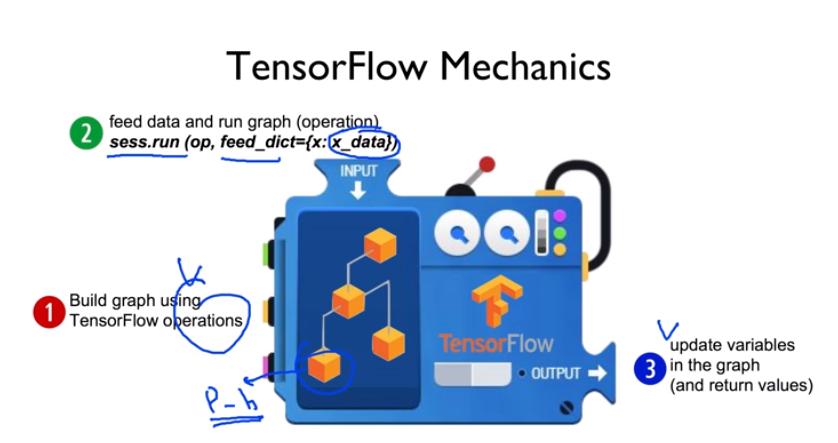

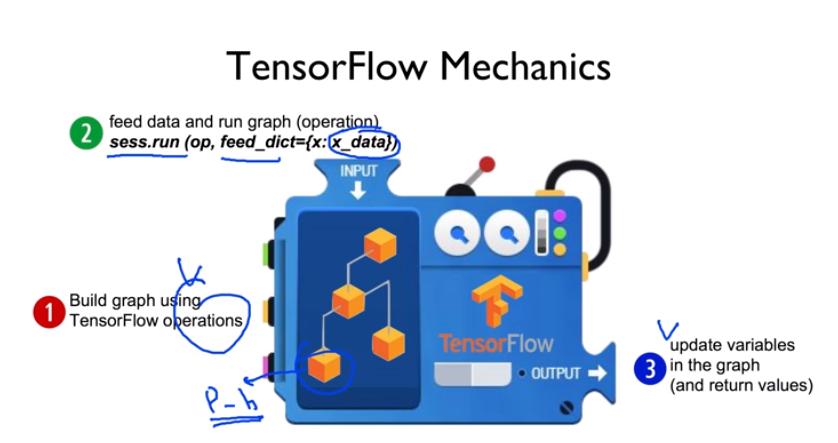

In [9]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, feed_dict = {a:3, b:4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2, 4]}))

7.5
[3. 7.]


### Everything is Tensor
### Tensors

In [10]:
3 #a rank 0 tensor; this is a scalar witih shape []
[1., 2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor' a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

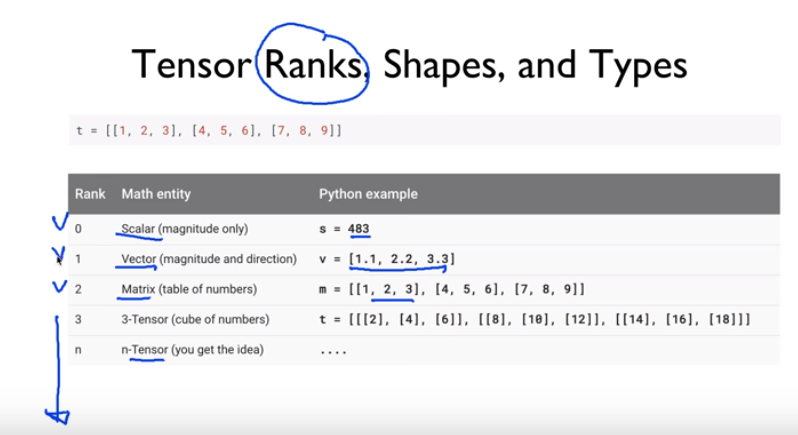

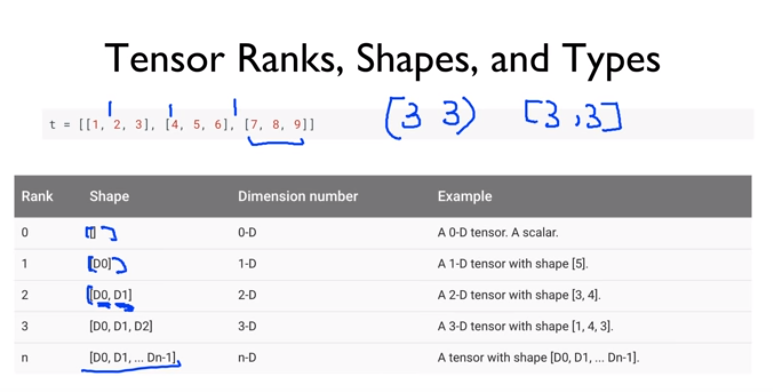

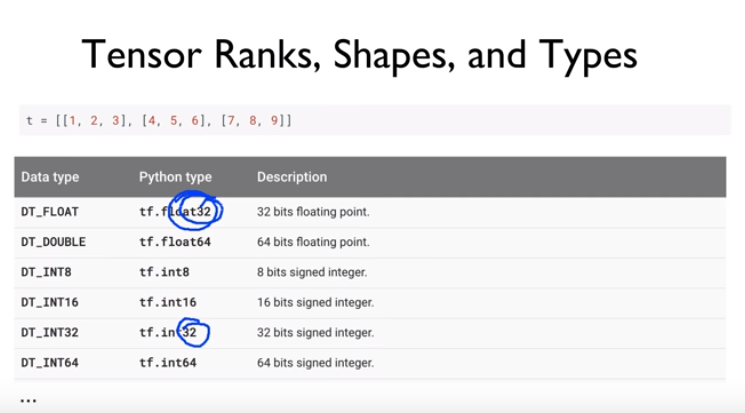

# Lec02

Linear Regression
(모델 구현 --> 새로운 데이터에 대해서 y값 예측)
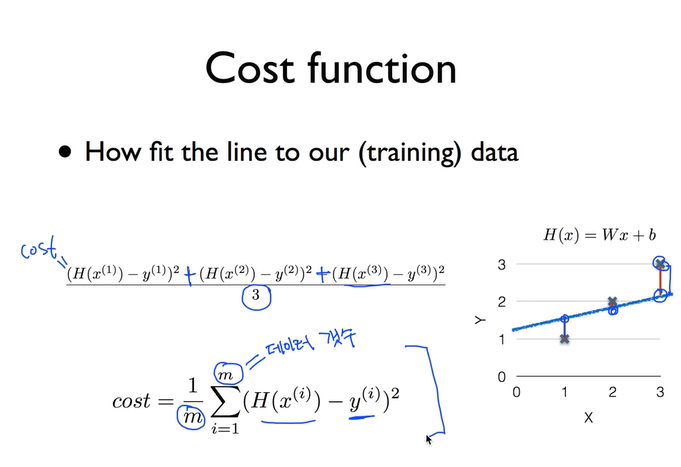

(Linear) Hypothesis
Training = finding the best linear line that fitting the given data

Which hypothesis is better?
Using the cost(loss) function
squred = we give more weights to the data that whose prediction is far from the real data.
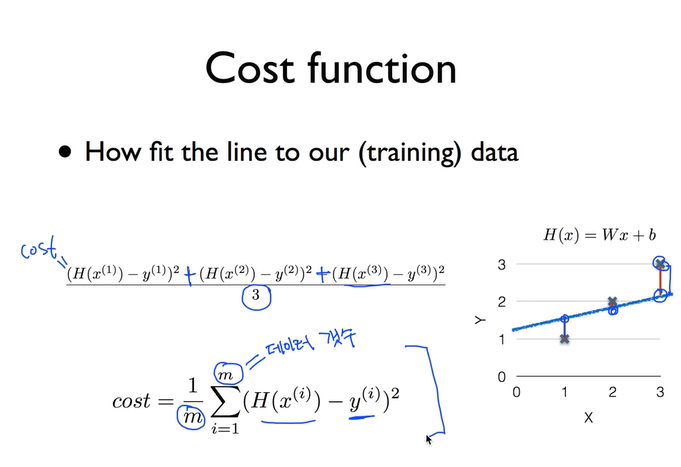

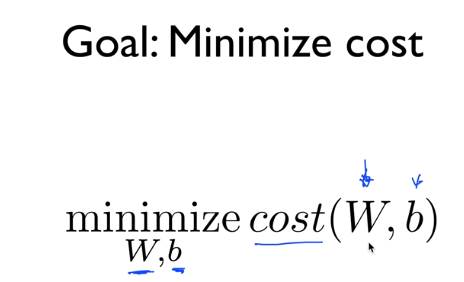

### Lab02

variable = tensorflow가 사용하는 variable(trainable variable)
--> tensorflow가 학습하는 과정에서 자동적으로 update시킨다.

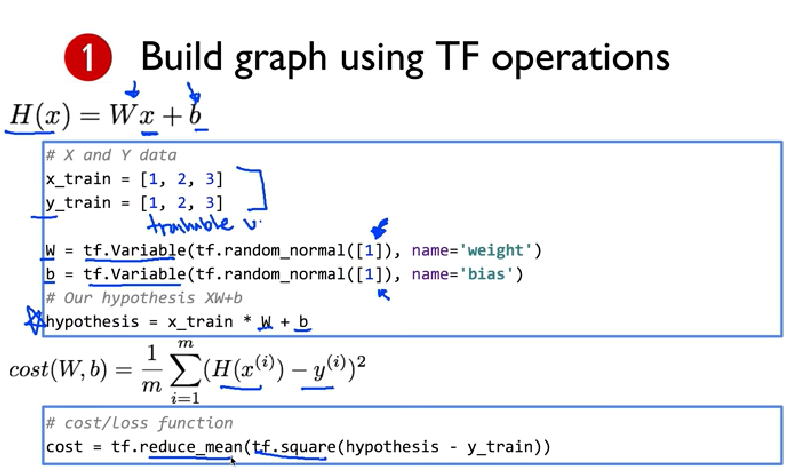

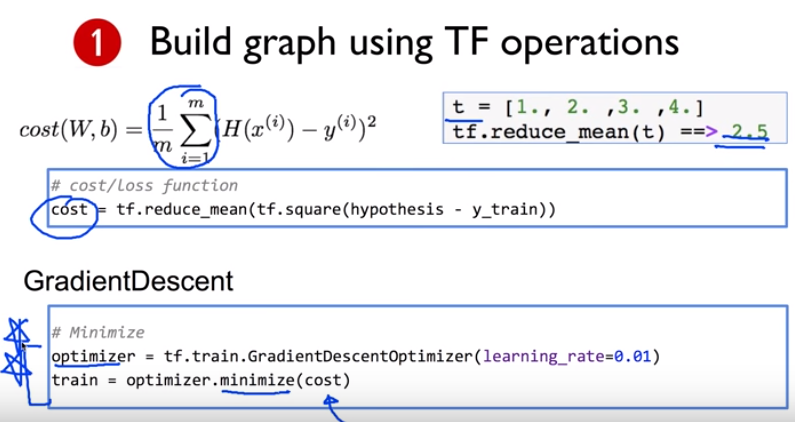
variable 사용 후 실행 전에는 반드시 gloabl_variables_initializer()를 사용해야 한다  

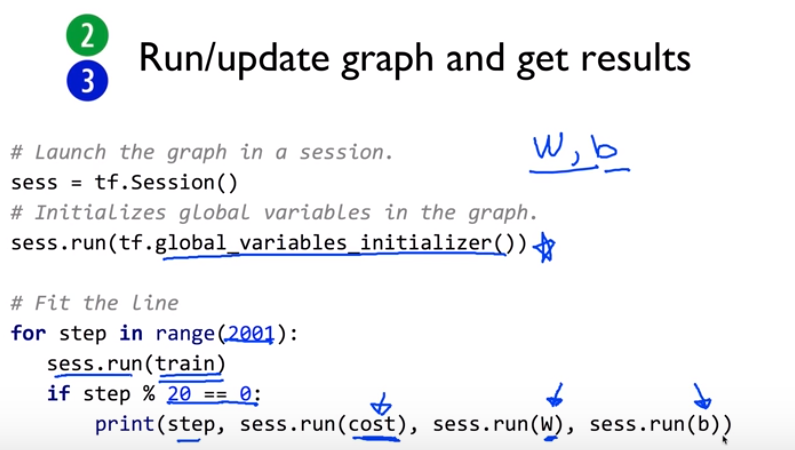

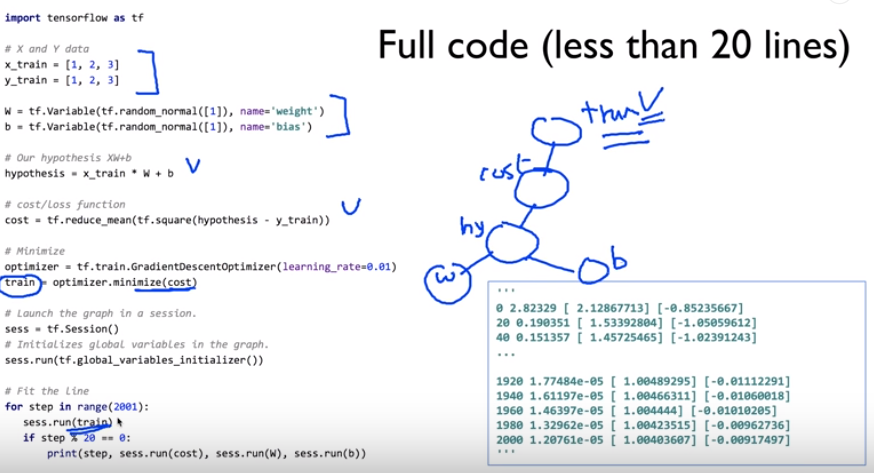

In [25]:
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW_b
hypothesis = x_train * W + b

#cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

#Launch the graph in a session
sess = tf.Session()

#Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())

#Fit the line
'''
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
'''
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train])
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)


0 1.655094 [0.7298268] [-0.7271044]
20 0.04850799 [1.16658] [-0.5063902]
40 0.030866658 [1.1991296] [-0.4648293]
60 0.027914008 [1.1936162] [-0.4412928]
80 0.025350852 [1.184883] [-0.42039266]
100 0.023024077 [1.1762291] [-0.40062046]
120 0.020910839 [1.1679503] [-0.38179138]
140 0.01899155 [1.1600575] [-0.36384848]
160 0.017248444 [1.1525354] [-0.34674895]
180 0.01566532 [1.1453668] [-0.33045304]
200 0.01422749 [1.1385351] [-0.314923]
220 0.012921614 [1.1320243] [-0.30012268]
240 0.011735623 [1.1258198] [-0.28601792]
260 0.010658477 [1.1199067] [-0.27257615]
280 0.009680193 [1.1142715] [-0.25976607]
300 0.008791718 [1.1089013] [-0.247558]
320 0.007984777 [1.1037832] [-0.23592371]
340 0.007251896 [1.0989058] [-0.22483611]
360 0.006586287 [1.0942576] [-0.21426964]
380 0.005981768 [1.0898278] [-0.20419975]
400 0.0054327403 [1.0856063] [-0.19460313]
420 0.0049341037 [1.0815834] [-0.1854576]
440 0.004481239 [1.077749] [-0.17674184]
460 0.0040699295 [1.074095] [-0.16843559]
480 0.0036963655

#### Using placeholder

In [24]:
import tensorflow as tf

# X and Y data
x_train = tf.placeholder(tf.float32)
y_train = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

#Our hypothesis XW_b
hypothesis = x_train * W + b

#cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)


#Launch the graph in a session
sess = tf.Session()

#Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())

#Fit the line
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, W, b, train], feed_dict = {x_train:[1, 2, 3], y_train:[1, 2, 3]})
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)

0 0.90012044 [-0.01544282] [2.4920845]
20 0.7902036 [-0.02581322] [2.3494103]
40 0.7174285 [0.01686472] [2.2365637]
60 0.6515777 [0.06254173] [2.1312218]
80 0.59177333 [0.10654852] [2.0310402]
100 0.537458 [0.14853269] [1.9355867]
120 0.48812786 [0.18854812] [1.844621]
140 0.44332564 [0.22668332] [1.7579305]
160 0.4026352 [0.2630265] [1.6753137]
180 0.36567977 [0.29766163] [1.5965801]
200 0.33211634 [0.33066887] [1.5215471]
220 0.30163345 [0.3621249] [1.4500402]
240 0.2739483 [0.39210263] [1.3818936]
260 0.24880433 [0.42067155] [1.3169498]
280 0.22596814 [0.44789776] [1.2550583]
300 0.20522793 [0.4738445] [1.1960752]
320 0.18639116 [0.49857193] [1.139864]
340 0.16928343 [0.52213717] [1.0862943]
360 0.15374595 [0.544595] [1.0352424]
380 0.1396345 [0.56599736] [0.98658997]
400 0.12681828 [0.5863939] [0.9402239]
420 0.115178384 [0.6058319] [0.8960368]
440 0.10460687 [0.6243564] [0.85392636]
460 0.09500563 [0.6420102] [0.813795]
480 0.08628564 [0.6588344] [0.7755496]
500 0.07836599 [0.6748

In [37]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X*W + b
cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val,W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict = {X:[1, 2, 3, 4, 5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

0 45.133347 [-0.66727453] [-0.18894278]
20 0.09472378 [1.1903518] [0.37975964]
40 0.08192082 [1.1857828] [0.42911613]
60 0.071541965 [1.1736513] [0.47306275]
80 0.062478166 [1.1622789] [0.5141215]
100 0.05456265 [1.1516511] [0.5524912]
120 0.04764995 [1.1417193] [0.588348]
140 0.041613065 [1.1324381] [0.6218565]
160 0.036340974 [1.1237646] [0.6531705]
180 0.031736843 [1.1156591] [0.6824338]
200 0.027716035 [1.1080846] [0.7097805]
220 0.024204623 [1.1010059] [0.73533624]
240 0.021138031 [1.0943911] [0.75921845]
260 0.018460015 [1.0882093] [0.7815365]
280 0.016121268 [1.0824323] [0.80239296]
300 0.014078851 [1.0770338] [0.8218835]
320 0.012295124 [1.0719887] [0.84009755]
340 0.010737434 [1.0672742] [0.85711884]
360 0.009377094 [1.0628684] [0.87302524]
380 0.008189077 [1.058751] [0.88789]
400 0.007151584 [1.0549034] [0.90178126]
420 0.0062455335 [1.0513078] [0.91476274]
440 0.0054542706 [1.0479475] [0.92689407]
460 0.004763255 [1.0448074] [0.9382309]
480 0.0041597867 [1.041873] [0.9488252

In [38]:
#Testing out model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

[6.100338]
[3.5997305]
[2.5994875 4.599973 ]


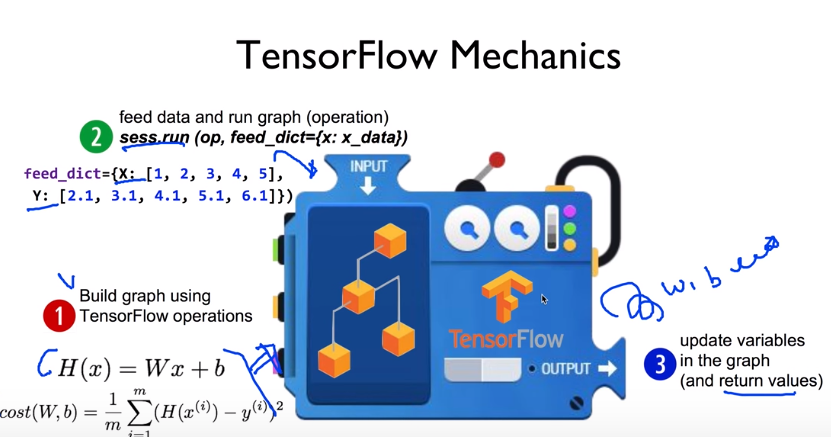

# Lec03

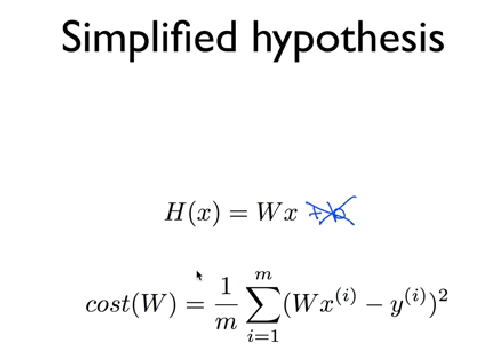

Gradient(경사) Descent Algorithm

- Minimize cost function
- Gradient descent is used may minimization problems
- For a given cost function, cost (W, b), it will find W, b to minimize cost
- It can be applied to more general function: cost(w1, w2)...

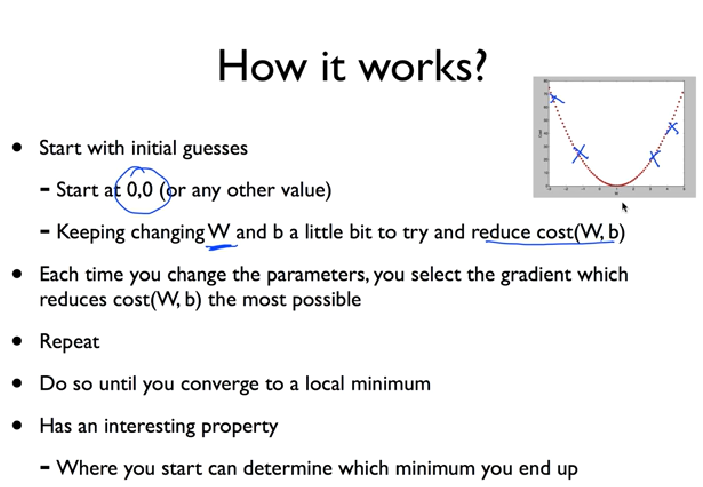

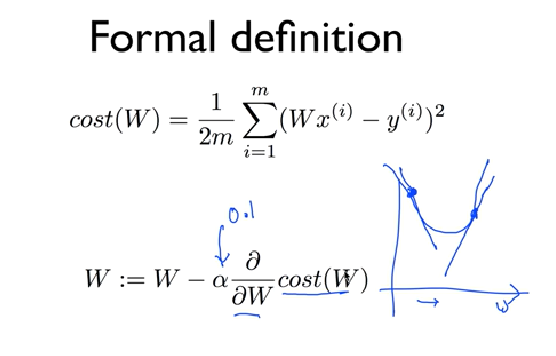

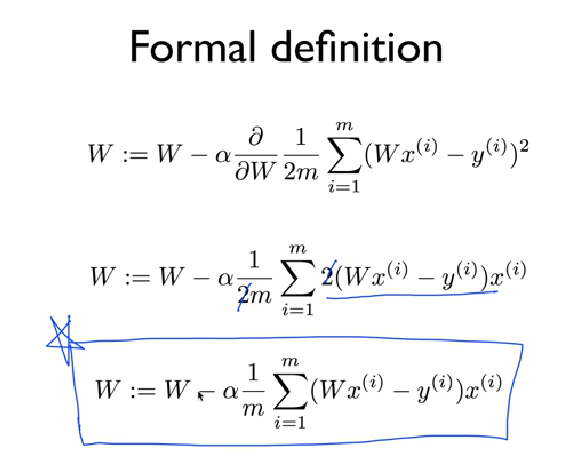

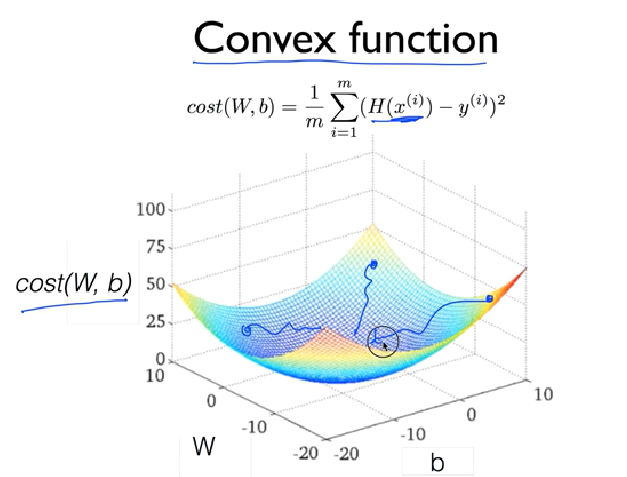

cost function이 항상 convex function이 되어야, gradient descent algorithm 적용할 수 있다.

## Lab03
### tensorflow로 cost function 최적화 구현

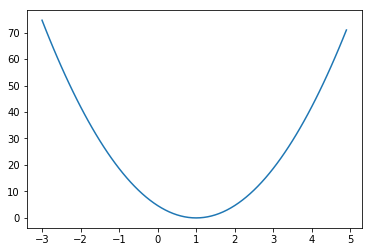

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = W * X

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_w = sess.run([cost, W], feed_dict = {W:feed_W})
    W_val.append(curr_w)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)

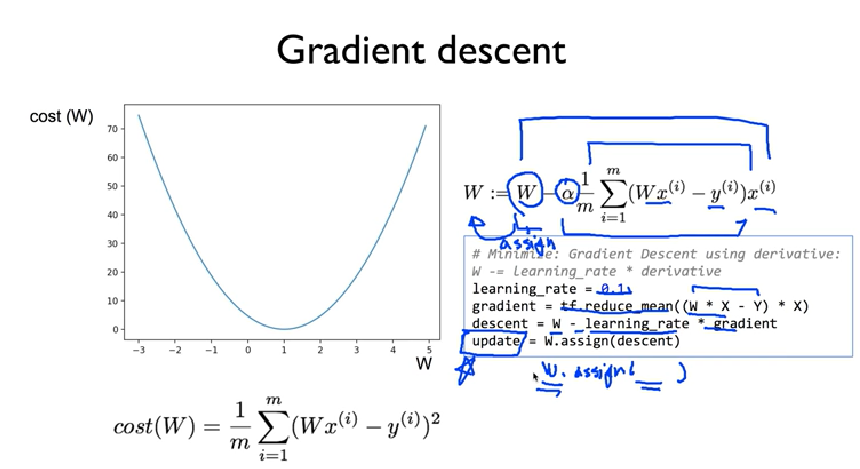

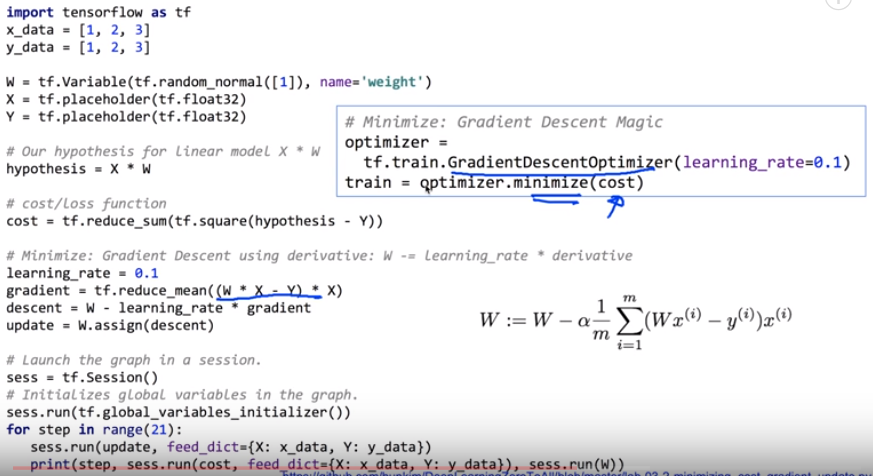

In [54]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weights')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X
cost = tf.reduce_mean(tf.square(hypothesis-Y))

#Minimize: Gradient Descent using derivatives: W -= Learning rate*deriavatives
learning_rate = 0.01
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    sess.run(update, feed_dict={X:x_train, Y:y_train})
    print(step, sess.run(cost, feed_dict={X:x_train, Y:y_train}), sess.run(W))

0 0.4165665 [0.70122874]
1 0.37859416 [0.7151714]
2 0.34408322 [0.7284634]
3 0.31271812 [0.7411351]
4 0.2842121 [0.7532155]
5 0.25830457 [0.7647321]
6 0.23475863 [0.7757113]
7 0.21335906 [0.7861781]
8 0.19391018 [0.79615647]
9 0.1762342 [0.8056692]
10 0.16016944 [0.814738]
11 0.14556915 [0.8233835]
12 0.13229968 [0.83162564]
13 0.120239824 [0.8394831]
14 0.109279275 [0.8469739]
15 0.09931781 [0.8541151]
16 0.09026443 [0.8609231]
17 0.08203635 [0.86741334]
18 0.074558295 [0.8736007]
19 0.06776188 [0.8794994]
20 0.061585035 [0.8851227]
21 0.05597117 [0.8904837]
22 0.050869107 [0.8955944]
23 0.046232115 [0.9004667]
24 0.042017817 [0.90511155]
25 0.03818764 [0.9095397]
26 0.0347066 [0.9137612]
27 0.03154288 [0.9177857]
28 0.028667541 [0.9216224]
29 0.02605435 [0.92528003]
30 0.023679344 [0.92876697]
31 0.021520846 [0.9320912]
32 0.019559113 [0.93526024]
33 0.017776204 [0.9382814]
34 0.016155783 [0.94116163]
35 0.014683091 [0.94390744]
36 0.013344638 [0.9465251]
37 0.012128219 [0.94902056]


296 1.8047785e-12 [0.9999994]
297 1.8047785e-12 [0.9999994]
298 1.8047785e-12 [0.9999994]
299 1.8047785e-12 [0.9999994]
300 1.8047785e-12 [0.9999994]
301 1.8047785e-12 [0.9999994]
302 1.8047785e-12 [0.9999994]
303 1.8047785e-12 [0.9999994]
304 1.8047785e-12 [0.9999994]
305 1.8047785e-12 [0.9999994]
306 1.8047785e-12 [0.9999994]
307 1.8047785e-12 [0.9999994]
308 1.8047785e-12 [0.9999994]
309 1.8047785e-12 [0.9999994]
310 1.8047785e-12 [0.9999994]
311 1.8047785e-12 [0.9999994]
312 1.8047785e-12 [0.9999994]
313 1.8047785e-12 [0.9999994]
314 1.8047785e-12 [0.9999994]
315 1.8047785e-12 [0.9999994]
316 1.8047785e-12 [0.9999994]
317 1.8047785e-12 [0.9999994]
318 1.8047785e-12 [0.9999994]
319 1.8047785e-12 [0.9999994]
320 1.8047785e-12 [0.9999994]
321 1.8047785e-12 [0.9999994]
322 1.8047785e-12 [0.9999994]
323 1.8047785e-12 [0.9999994]
324 1.8047785e-12 [0.9999994]
325 1.8047785e-12 [0.9999994]
326 1.8047785e-12 [0.9999994]
327 1.8047785e-12 [0.9999994]
328 1.8047785e-12 [0.9999994]
329 1.8047

596 1.8047785e-12 [0.9999994]
597 1.8047785e-12 [0.9999994]
598 1.8047785e-12 [0.9999994]
599 1.8047785e-12 [0.9999994]
600 1.8047785e-12 [0.9999994]
601 1.8047785e-12 [0.9999994]
602 1.8047785e-12 [0.9999994]
603 1.8047785e-12 [0.9999994]
604 1.8047785e-12 [0.9999994]
605 1.8047785e-12 [0.9999994]
606 1.8047785e-12 [0.9999994]
607 1.8047785e-12 [0.9999994]
608 1.8047785e-12 [0.9999994]
609 1.8047785e-12 [0.9999994]
610 1.8047785e-12 [0.9999994]
611 1.8047785e-12 [0.9999994]
612 1.8047785e-12 [0.9999994]
613 1.8047785e-12 [0.9999994]
614 1.8047785e-12 [0.9999994]
615 1.8047785e-12 [0.9999994]
616 1.8047785e-12 [0.9999994]
617 1.8047785e-12 [0.9999994]
618 1.8047785e-12 [0.9999994]
619 1.8047785e-12 [0.9999994]
620 1.8047785e-12 [0.9999994]
621 1.8047785e-12 [0.9999994]
622 1.8047785e-12 [0.9999994]
623 1.8047785e-12 [0.9999994]
624 1.8047785e-12 [0.9999994]
625 1.8047785e-12 [0.9999994]
626 1.8047785e-12 [0.9999994]
627 1.8047785e-12 [0.9999994]
628 1.8047785e-12 [0.9999994]
629 1.8047

922 1.8047785e-12 [0.9999994]
923 1.8047785e-12 [0.9999994]
924 1.8047785e-12 [0.9999994]
925 1.8047785e-12 [0.9999994]
926 1.8047785e-12 [0.9999994]
927 1.8047785e-12 [0.9999994]
928 1.8047785e-12 [0.9999994]
929 1.8047785e-12 [0.9999994]
930 1.8047785e-12 [0.9999994]
931 1.8047785e-12 [0.9999994]
932 1.8047785e-12 [0.9999994]
933 1.8047785e-12 [0.9999994]
934 1.8047785e-12 [0.9999994]
935 1.8047785e-12 [0.9999994]
936 1.8047785e-12 [0.9999994]
937 1.8047785e-12 [0.9999994]
938 1.8047785e-12 [0.9999994]
939 1.8047785e-12 [0.9999994]
940 1.8047785e-12 [0.9999994]
941 1.8047785e-12 [0.9999994]
942 1.8047785e-12 [0.9999994]
943 1.8047785e-12 [0.9999994]
944 1.8047785e-12 [0.9999994]
945 1.8047785e-12 [0.9999994]
946 1.8047785e-12 [0.9999994]
947 1.8047785e-12 [0.9999994]
948 1.8047785e-12 [0.9999994]
949 1.8047785e-12 [0.9999994]
950 1.8047785e-12 [0.9999994]
951 1.8047785e-12 [0.9999994]
952 1.8047785e-12 [0.9999994]
953 1.8047785e-12 [0.9999994]
954 1.8047785e-12 [0.9999994]
955 1.8047

1238 1.8047785e-12 [0.9999994]
1239 1.8047785e-12 [0.9999994]
1240 1.8047785e-12 [0.9999994]
1241 1.8047785e-12 [0.9999994]
1242 1.8047785e-12 [0.9999994]
1243 1.8047785e-12 [0.9999994]
1244 1.8047785e-12 [0.9999994]
1245 1.8047785e-12 [0.9999994]
1246 1.8047785e-12 [0.9999994]
1247 1.8047785e-12 [0.9999994]
1248 1.8047785e-12 [0.9999994]
1249 1.8047785e-12 [0.9999994]
1250 1.8047785e-12 [0.9999994]
1251 1.8047785e-12 [0.9999994]
1252 1.8047785e-12 [0.9999994]
1253 1.8047785e-12 [0.9999994]
1254 1.8047785e-12 [0.9999994]
1255 1.8047785e-12 [0.9999994]
1256 1.8047785e-12 [0.9999994]
1257 1.8047785e-12 [0.9999994]
1258 1.8047785e-12 [0.9999994]
1259 1.8047785e-12 [0.9999994]
1260 1.8047785e-12 [0.9999994]
1261 1.8047785e-12 [0.9999994]
1262 1.8047785e-12 [0.9999994]
1263 1.8047785e-12 [0.9999994]
1264 1.8047785e-12 [0.9999994]
1265 1.8047785e-12 [0.9999994]
1266 1.8047785e-12 [0.9999994]
1267 1.8047785e-12 [0.9999994]
1268 1.8047785e-12 [0.9999994]
1269 1.8047785e-12 [0.9999994]
1270 1.8

1575 1.8047785e-12 [0.9999994]
1576 1.8047785e-12 [0.9999994]
1577 1.8047785e-12 [0.9999994]
1578 1.8047785e-12 [0.9999994]
1579 1.8047785e-12 [0.9999994]
1580 1.8047785e-12 [0.9999994]
1581 1.8047785e-12 [0.9999994]
1582 1.8047785e-12 [0.9999994]
1583 1.8047785e-12 [0.9999994]
1584 1.8047785e-12 [0.9999994]
1585 1.8047785e-12 [0.9999994]
1586 1.8047785e-12 [0.9999994]
1587 1.8047785e-12 [0.9999994]
1588 1.8047785e-12 [0.9999994]
1589 1.8047785e-12 [0.9999994]
1590 1.8047785e-12 [0.9999994]
1591 1.8047785e-12 [0.9999994]
1592 1.8047785e-12 [0.9999994]
1593 1.8047785e-12 [0.9999994]
1594 1.8047785e-12 [0.9999994]
1595 1.8047785e-12 [0.9999994]
1596 1.8047785e-12 [0.9999994]
1597 1.8047785e-12 [0.9999994]
1598 1.8047785e-12 [0.9999994]
1599 1.8047785e-12 [0.9999994]
1600 1.8047785e-12 [0.9999994]
1601 1.8047785e-12 [0.9999994]
1602 1.8047785e-12 [0.9999994]
1603 1.8047785e-12 [0.9999994]
1604 1.8047785e-12 [0.9999994]
1605 1.8047785e-12 [0.9999994]
1606 1.8047785e-12 [0.9999994]
1607 1.8

1936 1.8047785e-12 [0.9999994]
1937 1.8047785e-12 [0.9999994]
1938 1.8047785e-12 [0.9999994]
1939 1.8047785e-12 [0.9999994]
1940 1.8047785e-12 [0.9999994]
1941 1.8047785e-12 [0.9999994]
1942 1.8047785e-12 [0.9999994]
1943 1.8047785e-12 [0.9999994]
1944 1.8047785e-12 [0.9999994]
1945 1.8047785e-12 [0.9999994]
1946 1.8047785e-12 [0.9999994]
1947 1.8047785e-12 [0.9999994]
1948 1.8047785e-12 [0.9999994]
1949 1.8047785e-12 [0.9999994]
1950 1.8047785e-12 [0.9999994]
1951 1.8047785e-12 [0.9999994]
1952 1.8047785e-12 [0.9999994]
1953 1.8047785e-12 [0.9999994]
1954 1.8047785e-12 [0.9999994]
1955 1.8047785e-12 [0.9999994]
1956 1.8047785e-12 [0.9999994]
1957 1.8047785e-12 [0.9999994]
1958 1.8047785e-12 [0.9999994]
1959 1.8047785e-12 [0.9999994]
1960 1.8047785e-12 [0.9999994]
1961 1.8047785e-12 [0.9999994]
1962 1.8047785e-12 [0.9999994]
1963 1.8047785e-12 [0.9999994]
1964 1.8047785e-12 [0.9999994]
1965 1.8047785e-12 [0.9999994]
1966 1.8047785e-12 [0.9999994]
1967 1.8047785e-12 [0.9999994]
1968 1.8

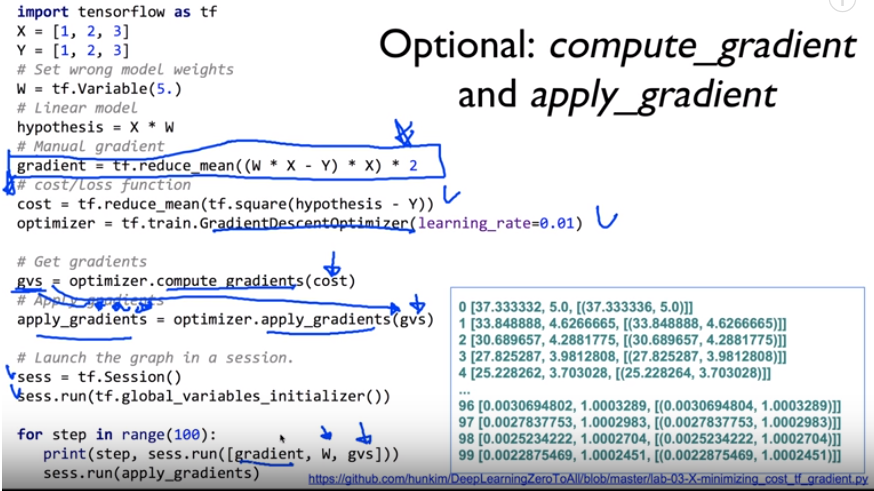

In [60]:
import tensorflow as tf
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

gradient = tf.reduce_mean((W*X-Y)*X)*2

hypothesis = W * X
cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#get gradients
gvs = optimizer.compute_gradients(cost, [W])
#gvs 수정~
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(100):
    print(sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)


[37.333332, 5.0, [(37.333336, 5.0)]]
[33.84889, 4.6266665, [(33.84889, 4.6266665)]]
[30.689657, 4.2881775, [(30.689657, 4.2881775)]]
[27.825289, 3.981281, [(27.825289, 3.981281)]]
[25.228264, 3.7030282, [(25.228264, 3.7030282)]]
[22.873625, 3.4507456, [(22.873627, 3.4507456)]]
[20.738754, 3.2220094, [(20.738754, 3.2220094)]]
[18.803139, 3.014622, [(18.803139, 3.014622)]]
[17.04818, 2.8265905, [(17.04818, 2.8265905)]]
[15.457016, 2.6561089, [(15.457016, 2.6561089)]]
[14.014362, 2.5015388, [(14.014362, 2.5015388)]]
[12.706355, 2.3613951, [(12.706355, 2.3613951)]]
[11.520428, 2.2343316, [(11.520429, 2.2343316)]]
[10.445188, 2.1191273, [(10.4451885, 2.1191273)]]
[9.470304, 2.0146754, [(9.4703045, 2.0146754)]]
[8.586408, 1.9199723, [(8.586408, 1.9199723)]]
[7.78501, 1.8341082, [(7.7850103, 1.8341082)]]
[7.058409, 1.7562581, [(7.0584097, 1.7562581)]]
[6.3996243, 1.6856741, [(6.399625, 1.6856741)]]
[5.8023267, 1.6216779, [(5.802327, 1.6216779)]]
[5.2607765, 1.5636547, [(5.2607765, 1.5636547)]

# Lec04: Multi-variable Linear Regression

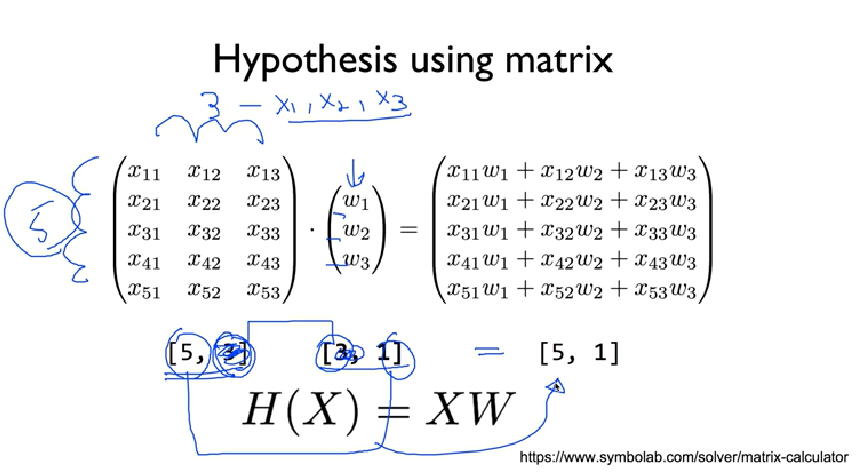

W의 shape는?
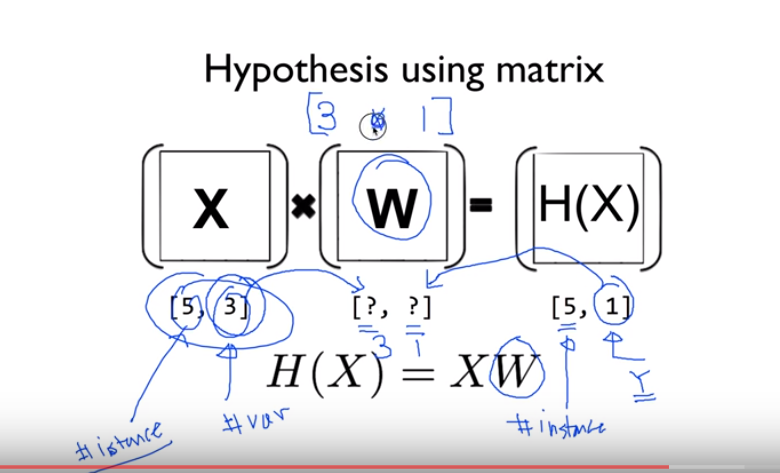

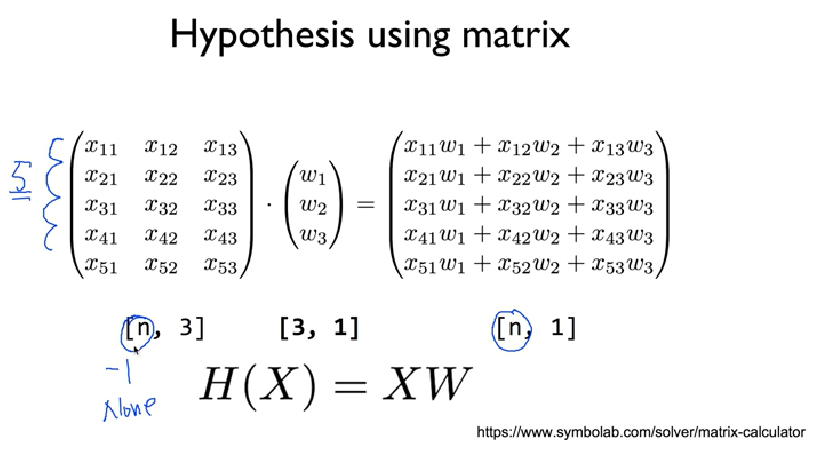

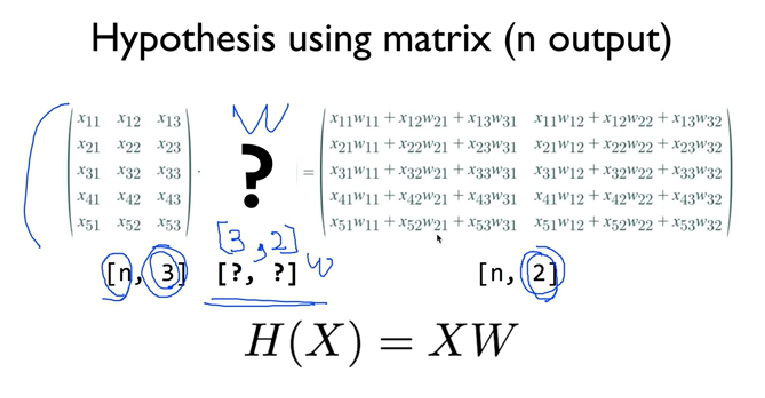

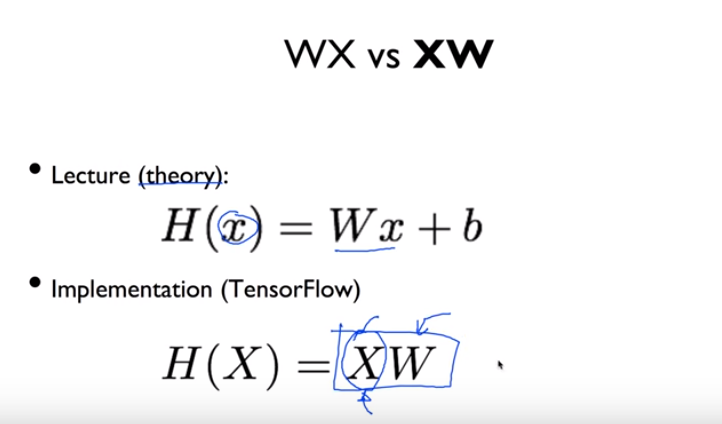

## Lab04-1

In [ ]:
import tensorflow as tf

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))


# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

imMatrix를 활용하여 코드를 간결하게 하자!

In [67]:
import tensorflow as tf

x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]
          
#placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])
          
W = tf.Variable(tf.random_normal([3, 1]), name = 'weights')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
          
hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
          
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  3469.0007 
Prediction:
 [[ 95.86263]
 [123.90093]
 [117.55067]
 [130.69197]
 [ 94.08918]]
10 Cost:  4.5483007 
Prediction:
 [[147.93661]
 [186.47935]
 [179.21584]
 [197.84238]
 [141.8193 ]]
20 Cost:  4.505353 
Prediction:
 [[148.09981]
 [186.66493]
 [179.40425]
 [198.04614]
 [141.95938]]
30 Cost:  4.494186 
Prediction:
 [[148.1059 ]
 [186.66171]
 [179.40662]
 [198.04732]
 [141.95547]]
40 Cost:  4.483029 
Prediction:
 [[148.11153]
 [186.65794]
 [179.40845]
 [198.04788]
 [141.95116]]
50 Cost:  4.4719577 
Prediction:
 [[148.11714]
 [186.65419]
 [179.41028]
 [198.04848]
 [141.94685]]
60 Cost:  4.4609475 
Prediction:
 [[148.12271]
 [186.65042]
 [179.41206]
 [198.04903]
 [141.94255]]
70 Cost:  4.449989 
Prediction:
 [[148.12828]
 [186.64668]
 [179.41388]
 [198.04959]
 [141.93828]]
80 Cost:  4.439088 
Prediction:
 [[148.13383]
 [186.64294]
 [179.41566]
 [198.05016]
 [141.934  ]]
90 Cost:  4.428216 
Prediction:
 [[148.13937]
 [186.6392 ]
 [179.41743]
 [198.05069]
 [141.92972]]
100 Cos

910 Cost:  3.6944702 
Prediction:
 [[148.54903]
 [186.3645 ]
 [179.55074]
 [198.08688]
 [141.62007]]
920 Cost:  3.6871657 
Prediction:
 [[148.55351]
 [186.3615 ]
 [179.5522 ]
 [198.08722]
 [141.61676]]
930 Cost:  3.6798809 
Prediction:
 [[148.558  ]
 [186.3585 ]
 [179.55365]
 [198.08754]
 [141.61342]]
940 Cost:  3.6726456 
Prediction:
 [[148.56245]
 [186.35551]
 [179.55511]
 [198.08786]
 [141.61012]]
950 Cost:  3.6654422 
Prediction:
 [[148.56691]
 [186.35252]
 [179.55656]
 [198.0882 ]
 [141.60683]]
960 Cost:  3.6582558 
Prediction:
 [[148.57137]
 [186.34955]
 [179.55804]
 [198.08853]
 [141.60355]]
970 Cost:  3.6511345 
Prediction:
 [[148.57579]
 [186.34659]
 [179.55948]
 [198.08885]
 [141.60025]]
980 Cost:  3.6440425 
Prediction:
 [[148.5802 ]
 [186.34363]
 [179.56093]
 [198.08917]
 [141.59698]]
990 Cost:  3.6369755 
Prediction:
 [[148.58461]
 [186.34068]
 [179.56238]
 [198.0895 ]
 [141.59372]]
1000 Cost:  3.6299481 
Prediction:
 [[148.58899]
 [186.33772]
 [179.5638 ]
 [198.0898 ]
 [1

1740 Cost:  3.1886513 
Prediction:
 [[148.88565]
 [186.13976]
 [179.66154]
 [198.10728]
 [141.37563]]
1750 Cost:  3.18363 
Prediction:
 [[148.8893 ]
 [186.13733]
 [179.66275]
 [198.10745]
 [141.37305]]
1760 Cost:  3.178617 
Prediction:
 [[148.89294]
 [186.13493]
 [179.66396]
 [198.1076 ]
 [141.37048]]
1770 Cost:  3.1736295 
Prediction:
 [[148.89656]
 [186.1325 ]
 [179.66516]
 [198.10774]
 [141.3679 ]]
1780 Cost:  3.168665 
Prediction:
 [[148.90019]
 [186.13008]
 [179.66637]
 [198.10793]
 [141.36536]]
1790 Cost:  3.1637368 
Prediction:
 [[148.9038 ]
 [186.1277 ]
 [179.66756]
 [198.10806]
 [141.3628 ]]
1800 Cost:  3.1588018 
Prediction:
 [[148.9074 ]
 [186.12529]
 [179.66875]
 [198.1082 ]
 [141.36024]]
1810 Cost:  3.1539073 
Prediction:
 [[148.911  ]
 [186.12291]
 [179.66995]
 [198.10837]
 [141.35773]]
1820 Cost:  3.149056 
Prediction:
 [[148.91457]
 [186.12053]
 [179.67113]
 [198.10852]
 [141.3552 ]]
1830 Cost:  3.1441894 
Prediction:
 [[148.91814]
 [186.11813]
 [179.67232]
 [198.10866]

## Lab04-2

In [69]:
#slicing
import numpy as np
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

b[:1]

array([[1, 2, 3, 4]])

In [71]:
b[-1]

array([ 9, 10, 11, 12])

In [72]:
b[-1:]

array([[ 9, 10, 11, 12]])

In [73]:
b[-1, ...]

array([ 9, 10, 11, 12])

In [74]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [76]:
import numpy as np
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [78]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X:x_data, Y:y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

0 Cost: 3164.1877 
Prediction:
 [[ 95.86263 ]
 [123.90093 ]
 [117.55067 ]
 [130.69197 ]
 [ 94.08918 ]
 [ 73.78978 ]
 [ 98.81136 ]
 [ 74.53782 ]
 [120.69896 ]
 [117.98978 ]
 [ 95.03678 ]
 [ 98.33265 ]
 [119.06886 ]
 [ 95.65517 ]
 [100.79844 ]
 [127.38625 ]
 [ 90.5479  ]
 [118.57812 ]
 [111.75107 ]
 [ 99.367905]
 [116.4634  ]
 [118.05749 ]
 [109.534645]
 [ 90.96478 ]
 [125.97374 ]]
10 Cost: 18.047676 
Prediction:
 [[148.25423 ]
 [186.84196 ]
 [179.58284 ]
 [198.24371 ]
 [142.08974 ]
 [109.166046]
 [149.37541 ]
 [112.02266 ]
 [179.50784 ]
 [172.44531 ]
 [143.75017 ]
 [146.35008 ]
 [183.16228 ]
 [148.94215 ]
 [151.58995 ]
 [191.25357 ]
 [141.29506 ]
 [179.26282 ]
 [172.86035 ]
 [154.0482  ]
 [175.75577 ]
 [177.10063 ]
 [166.0694  ]
 [143.80122 ]
 [191.21217 ]]
20 Cost: 17.7971 
Prediction:
 [[148.63275]
 [187.26811]
 [180.01805]
 [198.7118 ]
 [142.41246]
 [109.3915 ]
 [149.72511]
 [112.28179]
 [179.89224]
 [172.78575]
 [144.08456]
 [146.66483]
 [183.61745]
 [149.327  ]
 [151.93631]
 [191.6

310 Cost: 15.230332 
Prediction:
 [[149.09001]
 [187.0313 ]
 [180.20308]
 [198.75404]
 [142.16772]
 [108.87335]
 [149.74051]
 [112.29382]
 [179.29388]
 [171.80911]
 [144.02849]
 [146.20143]
 [183.95757]
 [149.7842 ]
 [151.81668]
 [191.36371]
 [142.04442]
 [179.78575]
 [173.77032]
 [154.92064]
 [176.12572]
 [177.16933]
 [166.53822]
 [145.00793]
 [191.61403]]
320 Cost: 15.152691 
Prediction:
 [[149.10474]
 [187.0235 ]
 [180.20895]
 [198.75534]
 [142.15964]
 [108.85652]
 [149.74103]
 [112.29435]
 [179.27441]
 [171.77751]
 [144.02664]
 [146.18637]
 [183.9684 ]
 [149.79878]
 [151.8128 ]
 [191.35327]
 [142.05658]
 [179.78906]
 [173.7854 ]
 [154.93597]
 [176.12447]
 [177.15865]
 [166.54068]
 [145.03403]
 [191.61234]]
330 Cost: 15.075719 
Prediction:
 [[149.11942]
 [187.01572]
 [180.2148 ]
 [198.75662]
 [142.1516 ]
 [108.83976]
 [149.74156]
 [112.29488]
 [179.25504]
 [171.74605]
 [144.0248 ]
 [146.1714 ]
 [183.9792 ]
 [149.81331]
 [151.80899]
 [191.3429 ]
 [142.0687 ]
 [179.79239]
 [173.80042]

640 Cost: 12.988319 
Prediction:
 [[149.54523 ]
 [186.78833 ]
 [180.38368 ]
 [198.79437 ]
 [141.91498 ]
 [108.353294]
 [149.75981 ]
 [112.31629 ]
 [178.6924  ]
 [170.83562 ]
 [143.9721  ]
 [145.7372  ]
 [184.2901  ]
 [150.2307  ]
 [151.70071 ]
 [191.04118 ]
 [142.41417 ]
 [179.89342 ]
 [174.23387 ]
 [155.39253 ]
 [176.09059 ]
 [176.8394  ]
 [166.61627 ]
 [145.81093 ]
 [191.55975 ]]
650 Cost: 12.929736 
Prediction:
 [[149.55807]
 [186.78143]
 [180.38876]
 [198.79555]
 [141.90776]
 [108.33862]
 [149.76047]
 [112.31713]
 [178.67543]
 [170.80827]
 [143.97055]
 [145.72412]
 [184.29942]
 [150.24318]
 [151.69756]
 [191.03209]
 [142.42441]
 [179.89664]
 [174.2469 ]
 [155.40582]
 [176.0897 ]
 [176.83011]
 [166.61856]
 [145.8335 ]
 [191.55817]]
660 Cost: 12.871642 
Prediction:
 [[149.57089]
 [186.77457]
 [180.39383]
 [198.7967 ]
 [141.90057]
 [108.32402]
 [149.76112]
 [112.31798]
 [178.65854]
 [170.78102]
 [143.96901]
 [145.71112]
 [184.3087 ]
 [150.25558]
 [151.69441]
 [191.02306]
 [142.4346 ]


960 Cost: 11.3401985 
Prediction:
 [[149.93127]
 [186.57962]
 [180.53539]
 [198.8298 ]
 [141.69562]
 [107.91259]
 [149.78204]
 [112.34671]
 [178.18268]
 [170.01643]
 [143.92624]
 [145.34534]
 [184.56763]
 [150.60138]
 [151.60822]
 [190.76793]
 [142.71588]
 [179.9942 ]
 [174.62268]
 [155.78967]
 [176.06633]
 [176.56006]
 [166.68713]
 [146.4851 ]
 [191.51006]]
970 Cost: 11.295554 
Prediction:
 [[149.94254 ]
 [186.57347 ]
 [180.53978 ]
 [198.83086 ]
 [141.68913 ]
 [107.899734]
 [149.78278 ]
 [112.34777 ]
 [178.1678  ]
 [169.99261 ]
 [143.92493 ]
 [145.33391 ]
 [184.57564 ]
 [150.61208 ]
 [151.60559 ]
 [190.75995 ]
 [142.7245  ]
 [179.99728 ]
 [174.63396 ]
 [155.80121 ]
 [176.06569 ]
 [176.5519  ]
 [166.68925 ]
 [146.50465 ]
 [191.50853 ]]
980 Cost: 11.251303 
Prediction:
 [[149.95375]
 [186.56737]
 [180.54417]
 [198.83191]
 [141.68268]
 [107.88693]
 [149.78354]
 [112.34884]
 [178.153  ]
 [169.96893]
 [143.92363]
 [145.32257]
 [184.58365]
 [150.62271]
 [151.603  ]
 [190.75201]
 [142.73308]

1310 Cost: 9.982096 
Prediction:
 [[150.29929]
 [186.37787]
 [180.67845]
 [198.86479]
 [141.48128]
 [107.49278]
 [149.80923]
 [112.38733]
 [177.69707]
 [169.24193]
 [143.88448]
 [144.97359]
 [184.82758]
 [150.94656]
 [151.52592]
 [190.50764]
 [142.99133]
 [180.09993]
 [174.98888]
 [156.1651 ]
 [176.04878]
 [176.29416]
 [166.75941]
 [147.12074]
 [191.45886]]
1320 Cost: 9.948889 
Prediction:
 [[150.30904]
 [186.37247]
 [180.68222]
 [198.86574]
 [141.47551]
 [107.48166]
 [149.81004]
 [112.38858]
 [177.68419]
 [169.22148]
 [143.8834 ]
 [144.96378]
 [184.8344 ]
 [150.9556 ]
 [151.52383]
 [190.50073]
 [142.99844]
 [180.10287]
 [174.99854]
 [156.17502]
 [176.0484 ]
 [176.28711]
 [166.7614 ]
 [147.13751]
 [191.45746]]
1330 Cost: 9.915949 
Prediction:
 [[150.31876]
 [186.36711]
 [180.68599]
 [198.86668]
 [141.46977]
 [107.47057]
 [149.81085]
 [112.38984]
 [177.67137]
 [169.20113]
 [143.88234]
 [144.95398]
 [184.8412 ]
 [150.96458]
 [151.52176]
 [190.49387]
 [143.00554]
 [180.10582]
 [175.00813]

1690 Cost: 8.89689 
Prediction:
 [[150.64352]
 [186.18625]
 [180.81067]
 [198.89886]
 [141.27528]
 [107.10044]
 [149.84105]
 [112.43771]
 [177.2432 ]
 [168.52435]
 [143.84755]
 [144.62787]
 [185.06586]
 [151.26076]
 [151.45529]
 [190.26442]
 [143.23604]
 [180.20917]
 [175.32674]
 [156.51294]
 [176.03838]
 [176.0459 ]
 [166.8321 ]
 [147.70792]
 [191.40697]]
1700 Cost: 8.872727 
Prediction:
 [[150.65187]
 [186.18155]
 [180.81384]
 [198.8997 ]
 [141.2702 ]
 [107.09092]
 [149.8419 ]
 [112.43911]
 [177.23216]
 [168.507  ]
 [143.84666]
 [144.61949]
 [185.07155]
 [151.26826]
 [151.45366]
 [190.25851]
 [143.24179]
 [180.21194]
 [175.33485]
 [156.52135]
 [176.0382 ]
 [176.03987]
 [166.83394]
 [147.72206]
 [191.40565]]
1710 Cost: 8.848791 
Prediction:
 [[150.6602  ]
 [186.17688 ]
 [180.81703 ]
 [198.90054 ]
 [141.26514 ]
 [107.081436]
 [149.84277 ]
 [112.440506]
 [177.2212  ]
 [168.48976 ]
 [143.84583 ]
 [144.61116 ]
 [185.07726 ]
 [151.27574 ]
 [151.45206 ]
 [190.25262 ]
 [143.24753 ]
 [180.214

In [81]:
#Ask my score
print("Your score will be:", sess.run(hypothesis, feed_dict={X:[[100, 70, 10]]}))

Your score will be: [[80.183945]]


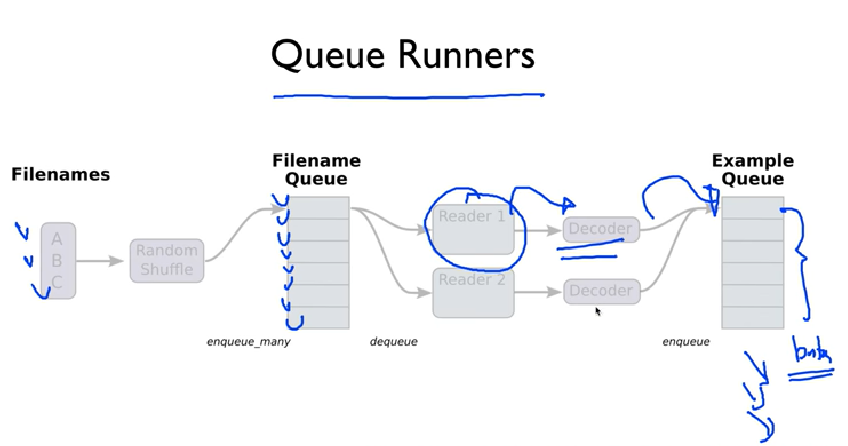

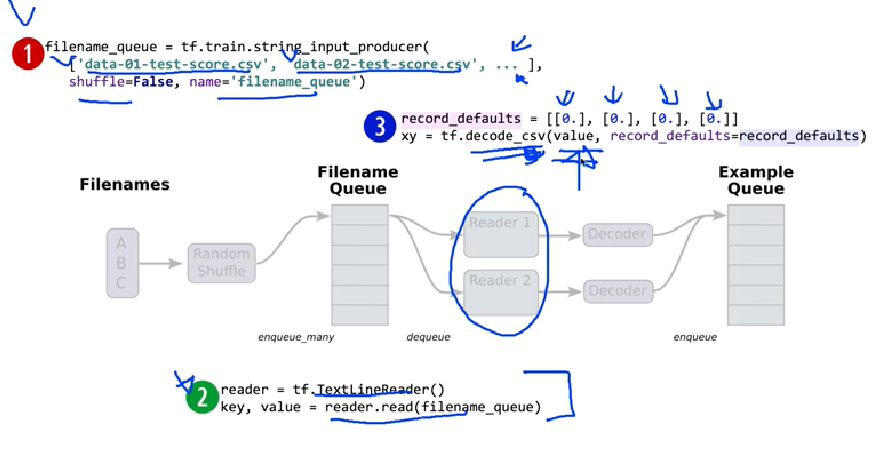

In [84]:
import tensorflow as tf
filename_queue = tf.train.string_input_producer(['data-01-test-score.csv'], shuffle = False, name = 'filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

#Default values, in case of empty columns. Also specifies the type of the decoded result
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

#collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size = 10)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess, coord = coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X:x_batch, Y:y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

0 Cost:  2730.7031 
Prediction:
 [[ 95.86263]
 [123.90093]
 [117.55067]
 [130.69197]
 [ 94.08918]
 [ 73.78978]
 [ 98.81136]
 [ 74.53782]
 [120.69896]
 [117.98978]]
10 Cost:  22.088947 
Prediction:
 [[148.93625]
 [187.6705 ]
 [180.39452]
 [199.1295 ]
 [142.72235]
 [109.63625]
 [150.03867]
 [112.51437]
 [180.28642]
 [173.17125]]
20 Cost:  23.920527 
Prediction:
 [[149.31055]
 [188.0903 ]
 [180.82416]
 [199.59119]
 [143.04019]
 [109.85745]
 [150.38342]
 [112.7697 ]
 [180.66418]
 [173.50467]]
30 Cost:  23.779911 
Prediction:
 [[149.32913]
 [188.08264]
 [180.83258]
 [199.59415]
 [143.032  ]
 [109.83832]
 [150.38481]
 [112.77046]
 [180.64246]
 [173.46811]]
40 Cost:  23.62652 
Prediction:
 [[149.34526]
 [188.07216]
 [180.83815]
 [199.59402]
 [143.02167]
 [109.81766]
 [150.38391]
 [112.76954]
 [180.61815]
 [173.42928]]
50 Cost:  23.474218 
Prediction:
 [[149.3613 ]
 [188.06166]
 [180.84367]
 [199.59387]
 [143.01134]
 [109.79707]
 [150.383  ]
 [112.76862]
 [180.59395]
 [173.39056]]
60 Cost:  23

520 Cost:  17.567646 
Prediction:
 [[150.043  ]
 [187.61276]
 [181.07613]
 [199.5893 ]
 [142.5663 ]
 [108.92285]
 [150.352  ]
 [112.7447 ]
 [179.5652 ]
 [171.75444]]
530 Cost:  17.465216 
Prediction:
 [[150.05608]
 [187.6041 ]
 [181.08057]
 [199.58926]
 [142.55765]
 [108.90611]
 [150.3516 ]
 [112.74457]
 [179.5455 ]
 [171.72325]]
540 Cost:  17.363434 
Prediction:
 [[150.06909]
 [187.59544]
 [181.08495]
 [199.58919]
 [142.549  ]
 [108.88941]
 [150.35117]
 [112.74443]
 [179.52585]
 [171.69217]]
550 Cost:  17.262646 
Prediction:
 [[150.08206]
 [187.58684]
 [181.08934]
 [199.58916]
 [142.54039]
 [108.8728 ]
 [150.35075]
 [112.74431]
 [179.5063 ]
 [171.66127]]
560 Cost:  17.162659 
Prediction:
 [[150.09497]
 [187.57826]
 [181.09369]
 [199.58911]
 [142.53183]
 [108.85627]
 [150.35036]
 [112.7442 ]
 [179.48685]
 [171.6305 ]]
570 Cost:  17.063437 
Prediction:
 [[150.10783 ]
 [187.56972 ]
 [181.09804 ]
 [199.58907 ]
 [142.52327 ]
 [108.839806]
 [150.34996 ]
 [112.744125]
 [179.46747 ]
 [171.599

1030 Cost:  13.272611 
Prediction:
 [[150.64415]
 [187.21065]
 [181.27759]
 [199.58875]
 [142.16144]
 [108.15336]
 [150.33998]
 [112.75286]
 [178.65968]
 [170.32886]]
1040 Cost:  13.2048855 
Prediction:
 [[150.6547 ]
 [187.20354]
 [181.28108]
 [199.58878]
 [142.1542 ]
 [108.13988]
 [150.33994]
 [112.75329]
 [178.64381]
 [170.30403]]
1050 Cost:  13.137723 
Prediction:
 [[150.66519 ]
 [187.19646 ]
 [181.28456 ]
 [199.58879 ]
 [142.14702 ]
 [108.126465]
 [150.33989 ]
 [112.753746]
 [178.62802 ]
 [170.27933 ]]
1060 Cost:  13.07106 
Prediction:
 [[150.67566 ]
 [187.18939 ]
 [181.28802 ]
 [199.58884 ]
 [142.13985 ]
 [108.11309 ]
 [150.33984 ]
 [112.754196]
 [178.61229 ]
 [170.25471 ]]
1070 Cost:  13.004903 
Prediction:
 [[150.68605]
 [187.18236]
 [181.29147]
 [199.58885]
 [142.13269]
 [108.09977]
 [150.3398 ]
 [112.75466]
 [178.59662]
 [170.23021]]
1080 Cost:  12.939328 
Prediction:
 [[150.69641 ]
 [187.17534 ]
 [181.2949  ]
 [199.58888 ]
 [142.12556 ]
 [108.086525]
 [150.33977 ]
 [112.75514

1530 Cost:  10.471163 
Prediction:
 [[151.12059 ]
 [186.88643 ]
 [181.43413 ]
 [199.59137 ]
 [141.82964 ]
 [107.544716]
 [150.34386 ]
 [112.78496 ]
 [177.94344 ]
 [169.21407 ]]
1540 Cost:  10.425742 
Prediction:
 [[151.12912 ]
 [186.88055 ]
 [181.43692 ]
 [199.59145 ]
 [141.82358 ]
 [107.533806]
 [150.34406 ]
 [112.78578 ]
 [177.9306  ]
 [169.19421 ]]
1550 Cost:  10.380631 
Prediction:
 [[151.13763]
 [186.87471]
 [181.43967]
 [199.5915 ]
 [141.81752]
 [107.52294]
 [150.34425]
 [112.78661]
 [177.9178 ]
 [169.17444]]
1560 Cost:  10.335968 
Prediction:
 [[151.14612]
 [186.8689 ]
 [181.44243]
 [199.59161]
 [141.81152]
 [107.51213]
 [150.34447]
 [112.78746]
 [177.90509]
 [169.15477]]
1570 Cost:  10.291586 
Prediction:
 [[151.15456]
 [186.86308]
 [181.44518]
 [199.59167]
 [141.80553]
 [107.50136]
 [150.34468]
 [112.7883 ]
 [177.89241]
 [169.13518]]
1580 Cost:  10.2476 
Prediction:
 [[151.16298]
 [186.85732]
 [181.4479 ]
 [199.59177]
 [141.79955]
 [107.49063]
 [150.34491]
 [112.78916]
 [177.8

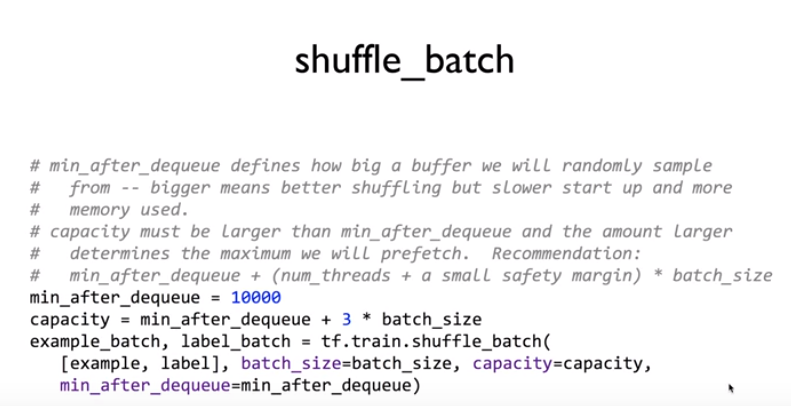

# Lec05: Logistic(regression) classfication

Classification
- Facebook feed: show or hide
- Credit Card Fraudulent Transaction detection:legitimate/fraud

**0, 1 encoding**

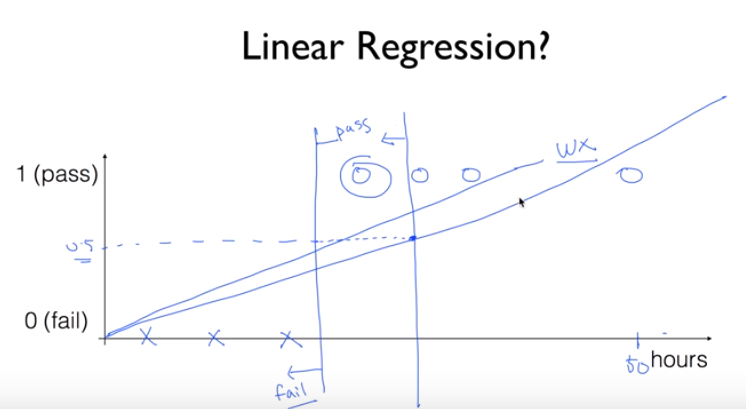

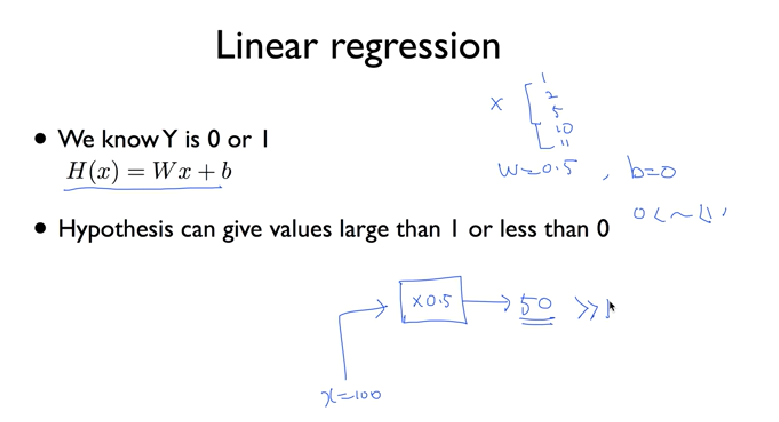

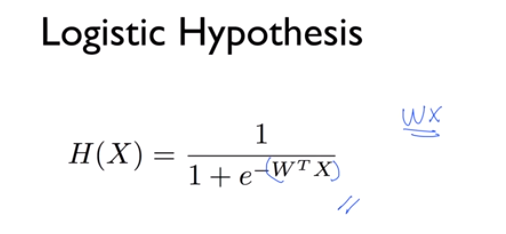

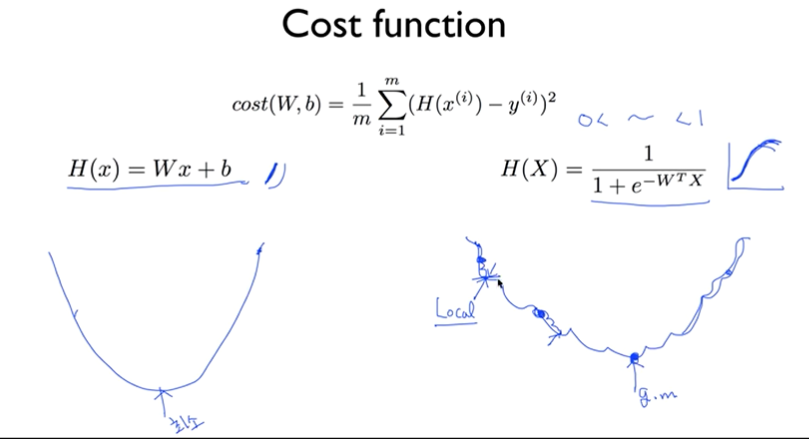

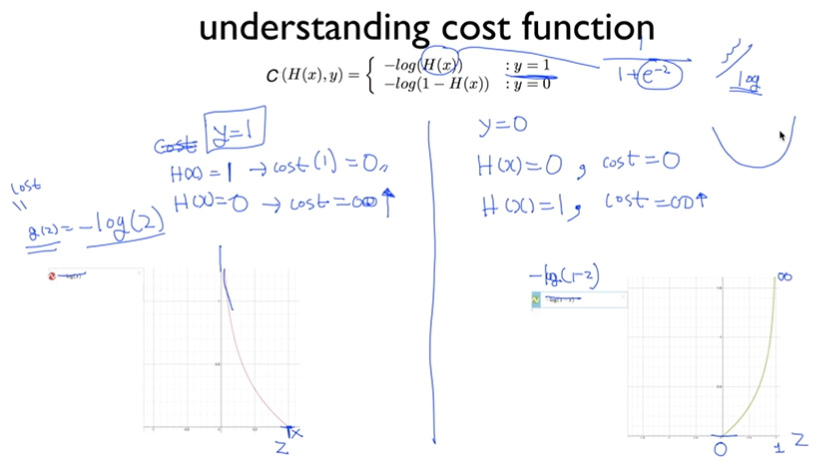

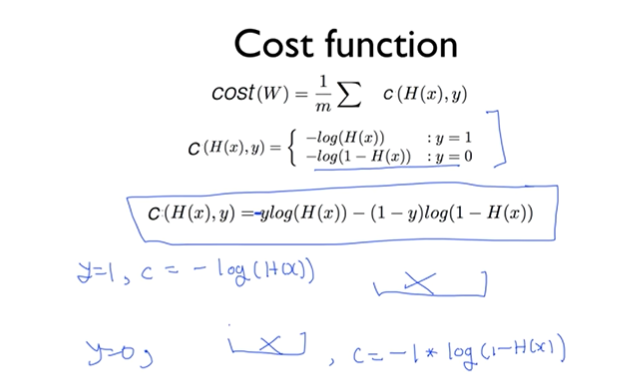

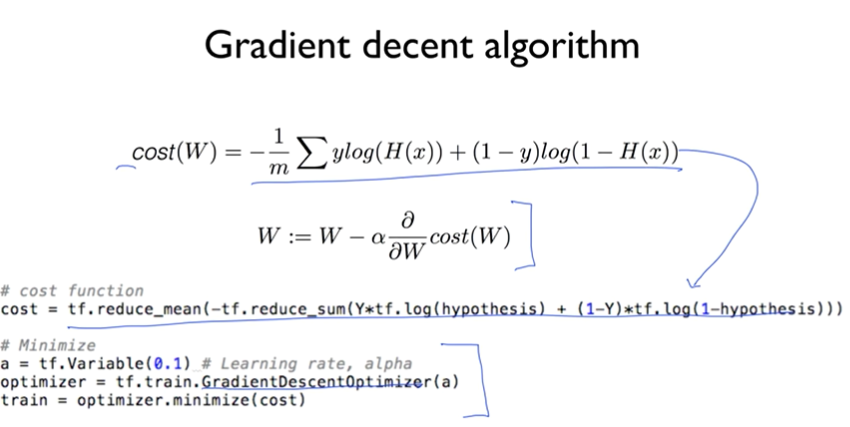

## Lab05

In [85]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

#placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)+b))
hypothesis = tf.sigmoid(tf.matmul(X, W)+b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

#Accuracy computation
#True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

#Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    
    #Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y:y_data})
    
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 2.503977
200 0.4395419
400 0.42246842
600 0.40802348
800 0.39442495
1000 0.38156268
1200 0.36936548
1400 0.35778248
1600 0.34677348
1800 0.33630446
2000 0.32634482
2200 0.31686637
2400 0.30784264
2600 0.2992483
2800 0.2910597
3000 0.283254
3200 0.27580976
3400 0.26870656
3600 0.26192507
3800 0.25544715
4000 0.24925555
4200 0.24333422
4400 0.23766787
4600 0.23224239
4800 0.22704418
5000 0.22206078
5200 0.21728031
5400 0.21269186
5600 0.20828505
5800 0.20405005
6000 0.19997787
6200 0.19605987
6400 0.19228812
6600 0.18865506
6800 0.18515366
7000 0.18177722
7200 0.17851959
7400 0.17537491
7600 0.17233767
7800 0.16940284
8000 0.16656533
8200 0.16382074
8400 0.16116472
8600 0.15859313
8800 0.15610225
9000 0.15368839
9200 0.15134814
9400 0.1490783
9600 0.14687584
9800 0.14473791
10000 0.1426617

Hypothesis:  [[0.02791846]
 [0.15483584]
 [0.2910699 ]
 [0.787758  ]
 [0.9435226 ]
 [0.981502  ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


Classifying diabetes

In [90]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter = ',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) +b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis>0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y:y_data}
    for step in range(10001):
        sess.run(train, feed_dict=feed)
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict=feed))
    
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed)
    print("\nHypothesis:", h, "\nCorrect (Y):", c, "\nAccuracy:", a)

0 1.0475601
200 0.9201635
400 0.8673575
600 0.82994866
800 0.79776305
1000 0.7688819
1200 0.7428024
1400 0.7192637
1600 0.69804543
1800 0.6789378
2000 0.6617393
2200 0.64625996
2400 0.6323229
2600 0.61976534
2800 0.6084392
3000 0.5982107
3200 0.58895975
3400 0.5805796
3600 0.57297486
3800 0.5660615
4000 0.5597647
4200 0.5540189
4400 0.54876596
4600 0.5439548
4800 0.53953993
5000 0.5354817
5200 0.5317446
5400 0.5282974
5600 0.52511245
5800 0.5221652
6000 0.51943344
6200 0.5168979
6400 0.5145411
6600 0.51234734
6800 0.51030266
7000 0.5083945
7200 0.5066115
7400 0.50494355
7600 0.50338143
7800 0.5019167
8000 0.5005419
8200 0.4992502
8400 0.49803534
8600 0.49689162
8800 0.4958139
9000 0.49479747
9200 0.49383795
9400 0.49293143
9600 0.49207422
9800 0.49126312
10000 0.4904949

Hypothesis: [[0.3975181 ]
 [0.9065144 ]
 [0.20759325]
 [0.9318518 ]
 [0.16581039]
 [0.7396161 ]
 [0.9357212 ]
 [0.61440855]
 [0.26900518]
 [0.52979326]
 [0.7319069 ]
 [0.200671  ]
 [0.20224442]
 [0.2557253 ]
 [0.717645